# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [3]:
df.info()

print('\nos tipos de dados para as colunas parecem condizentes, mas vou alterar os dados que estão como obhect (Yes/No) para uma variavel binæria.\n') 

binarias = ['Casado','Dependents', 'PhoneService', 'Servico_Seguranca', 'Suporte_Tecnico','StreamingTV', 'Churn']

for i in binarias:
    temp = []
    for x in df[i]:
        if x == 'Yes':
            temp.append(1)
        elif x == 'No':
            temp.append(0)
        else:
            temp.append(x)
    df[i] = temp

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,1,0,1,0.0,DSL,0,0,0,Month-to-month,Electronic check,29.85,29.85,0.0
1,5575-GNVDE,Male,0,0,0,34,1.0,DSL,1,0,0,One year,Mailed check,56.95,1889.50,0.0
2,3668-QPYBK,Male,0,0,0,2,1.0,DSL,1,0,0,Month-to-month,Mailed check,53.85,108.15,1.0
3,7795-CFOCW,Male,0,0,0,45,0.0,DSL,1,1,0,One year,Bank transfer (automatic),NaN,1840.75,0.0
4,9237-HQITU,NaN,0,0,0,2,1.0,Fiber optic,0,0,0,Month-to-month,Electronic check,NaN,151.65,1.0
5,9305-CDSKC,NaN,0,0,0,8,1.0,Fiber optic,0,0,1,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,0,1,22,1.0,Fiber optic,0,0,1,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,0,0,10,0.0,DSL,1,0,0,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,1,0,28,1.0,Fiber optic,0,1,1,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,0,1,62,1.0,dsl,1,0,0,One year,Bank transfer (automatic),NaN,3487.95,NaN


In [4]:
df.info()

print('\nTodas as variáveis que sofreram a alteração anterior deveriam estar como inteiras, então tem algo de errado com elas, logo precisa de investigação')

for i in binarias:
    print(df[i].unique())

print('\nPode ser notado que as colunas Servico_Seguranca, Suporte_Tecnico e StreamingTV tem um valor "No internet service" que podem ser substituidos por zero dada a natureza da coluna\n')

for i in binarias[3:6]:
    temp = []
    for x in df[i]:
        if x == 'No internet service':
            temp.append(0)
        else:
            temp.append(x)
    df[i] = temp
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   int64  
 4   Dependents          2500 non-null   int64  
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   float64
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   float64
dtypes: flo

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [5]:
print(df.isnull().values.any())
print((df.isnull().sum() / len(df)) * 100)

True
customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64


B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [6]:
print('\nExcluindo os valores nulos em Genero e Chrun porque em ambos representa menos de 0,5 por cento da base\n')

df.dropna(subset=['Genero','Churn'], inplace=True)

print((df.isnull().sum() / len(df)) * 100)


Excluindo os valores nulos em Genero e Chrun porque em ambos representa menos de 0,5 por cento da base

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64


C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [ ]:
#Tratando a coluna PhoneService
print(df['PhoneService'].value_counts(normalize=True)*100)
print('\n91,45 é o percentual de 1 na coluna PhoneService, então é coerente substituir os valores nulos por 1.\nMas eu recomenndo fortemente remover ela de uma análise se possível, dado o grande volume de valores nulos\n')
df['PhoneService'].fillna(1, inplace=True)

PhoneService
1.0    91.451292
0.0     8.548708
Name: proportion, dtype: float64

91,45 é o percentual de 1 na coluna PhoneService, então é coerente substituir os valores nulos por 1.
Mas eu recomenndo fortemente remover ela de uma análise se possível, dado o grande volume de valores nulos


/tmp/ipykernel_40512/232377287.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhoneService'].fillna(1, inplace=True)


Estatísticas Descritivas:

count    2175.000000
mean       65.607563
std        29.931520
min        18.400000
25%        39.500000
50%        71.450000
75%        90.250000
max       118.650000
Name: Pagamento_Mensal, dtype: float64

Mediana:

71.45


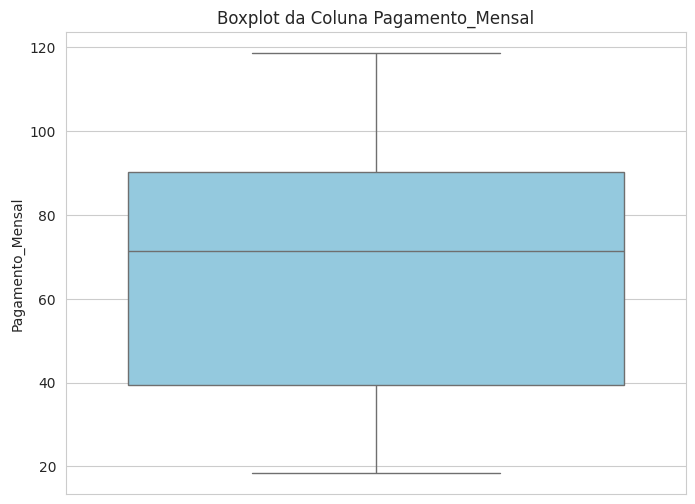

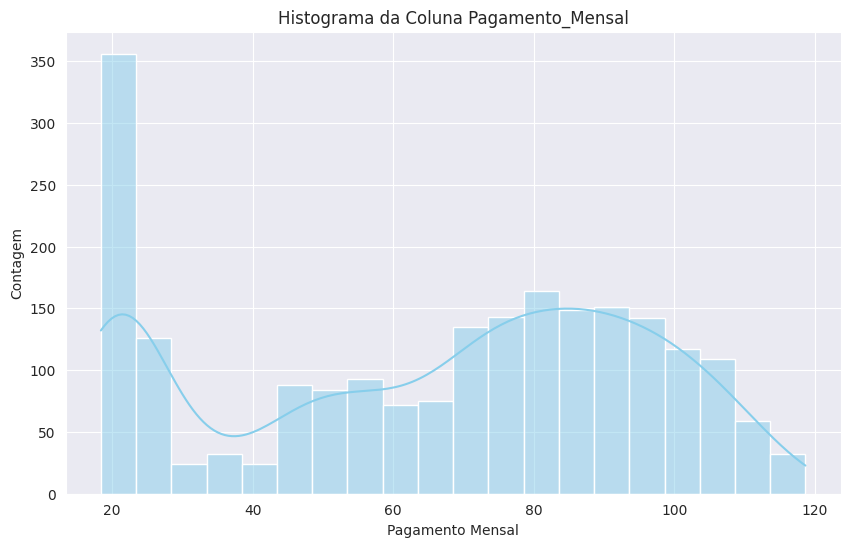

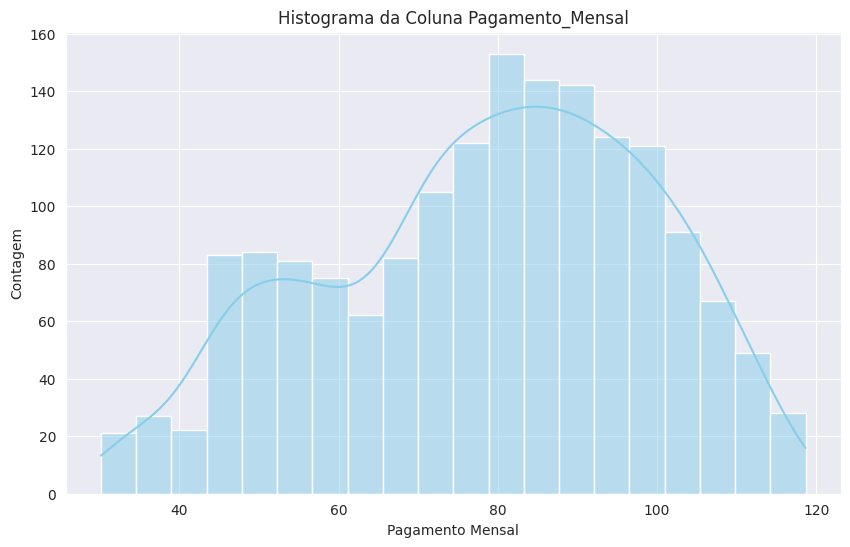

Pelos dados terem um maior peso para um lado, será usada a mediana para preencher os valores nulos da coluna Pagamento_Mensal


/tmp/ipykernel_40512/30786788.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pagamento_Mensal'].fillna(pag_mensal_mediana, inplace=True)


In [11]:
#Tratando a coluna Pagamento_Mensal
print('Estatísticas Descritivas:\n')
print(df[df['Pagamento_Mensal'].notnull()]['Pagamento_Mensal'].describe())
print('\nMediana:\n')
print(df['Pagamento_Mensal'].median())

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna Pagamento_Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna Pagamento_Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Contagem')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Pagamento_Mensal'] >= 30], x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna Pagamento_Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Contagem')
plt.show()

print('Pelos dados terem um maior peso para um lado, será usada a mediana para preencher os valores nulos da coluna Pagamento_Mensal')
pag_mensal_mediana = df['Pagamento_Mensal'].median()
df['Pagamento_Mensal'].fillna(pag_mensal_mediana, inplace=True)

In [12]:
print((df.isnull().sum() / len(df)) * 100)

customerID            0.0
Genero                0.0
Idoso                 0.0
Casado                0.0
Dependents            0.0
Tempo_como_Cliente    0.0
PhoneService          0.0
Servico_Internet      0.0
Servico_Seguranca     0.0
Suporte_Tecnico       0.0
StreamingTV           0.0
Tipo_Contrato         0.0
PaymentMethod         0.0
Pagamento_Mensal      0.0
Total_Pago            0.0
Churn                 0.0
dtype: float64


# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [13]:
strings = ['Genero', 'Servico_Internet', 'Tipo_Contrato', 'PaymentMethod']
print('Antes da alteração\n')
for i in strings:
    print(df[i].unique())
df['Genero'] = df['Genero'].replace('M', 'Male')
temp = []
for i in df['Genero']:
    if i != 'Male':
        temp.append('Female')
    else:
        temp.append(i)
df["Genero"] = temp

df['Servico_Internet'] =df['Servico_Internet'].str.lower()

print('\nDepois da alteração\n')
for i in strings:
    print(df[i].unique())

Antes da alteração

['Female' 'Male' 'F' 'M' 'f']
['DSL' 'No' 'Fiber optic' 'dsl']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Depois da alteração

['Female' 'Male']
['dsl' 'no' 'fiber optic']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [16]:
#Colocando tudo em inglês porque os inputs de dados estão em inglês

colunas = {
    'customerID': 'CustomerID',
    'Genero': 'Gender',
    'Idoso': 'Senior',
    'Casado': 'Married',
    'Dependents': 'Dependents',
    'Tempo_como_Cliente': 'Tenure',
    'PhoneService': 'PhoneService',
    'Servico_Internet': 'InternetService',
    'Servico_Seguranca': 'SecurityService',
    'Suporte_Tecnico': 'TechinicalSupport', 
    'StreamingTV': 'StreamingTV',
    'Tipo_Contrato': 'ContractType',
    'PaymentMethod': 'PaymentMethod',
    'Pagamento_Mensal': 'MonthlyCharges',
    'Total_Pago': 'TotalCharges',
    'Churn': 'Churn'
}

df.rename(columns=colunas, inplace=True)